Using the the [Wisconsin Breast Cancer Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (`radius_mean`) and its mean number of concave points (`concave points_mean`).

This notebook is a [DataCamp](https://learn.datacamp.com/) exercise

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
# View the values for 'diagnosis'
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
# Replace 'B' and 'M' with 0 and 1 respectively
df.replace({'M':1, 'B':0}, inplace=True)

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
df_mean = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
              'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
              'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

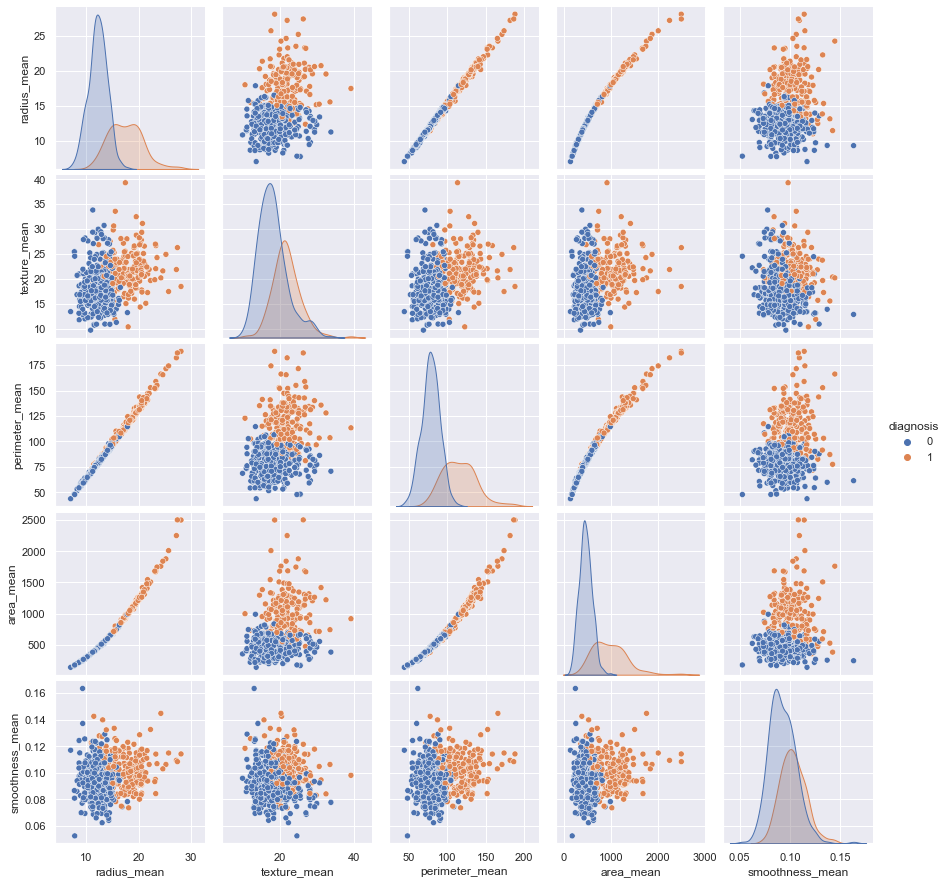

In [10]:
# Plot out pairplots for 5 columns at a time with 'diagnosis' as the target
excol = ['compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
df1 = df_mean.drop(excol, axis=1)
sns.set_theme()
sns.pairplot(df1, hue='diagnosis')

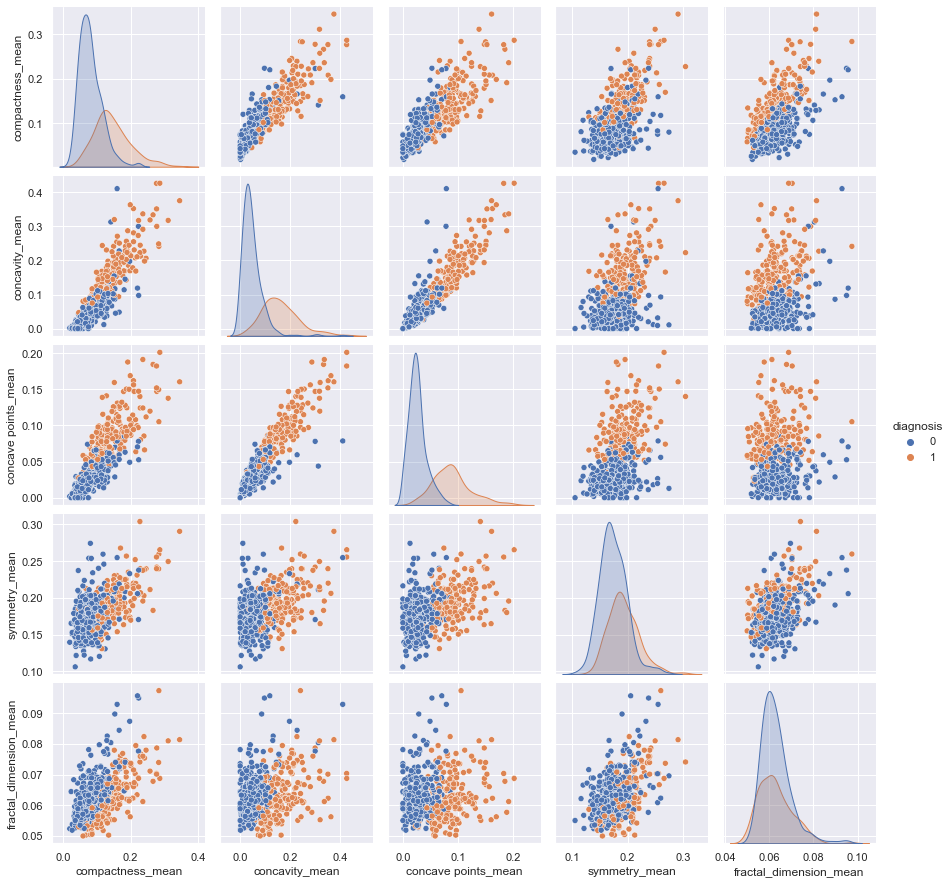

In [11]:
# Plot out pairplots for 5 columns at a time with 'diagnosis' as the target
excol = ['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean']
df2 = df_mean.drop(excol, axis=1)
sns.set_theme()
sns.pairplot(df2, hue='diagnosis')

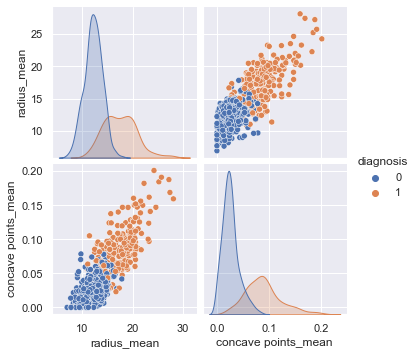

In [12]:
# Plot out pairplots for 4 columns at a time with 'diagnosis' as the target
df3 = df_mean[['diagnosis','radius_mean','concave points_mean']]
sns.set_theme()
sns.pairplot(df3, hue='diagnosis')

In [13]:
X = df[['radius_mean','concave points_mean']]

In [14]:
y = df['diagnosis']

In [15]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

In [17]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [18]:
# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 0 1 0]


## Evaluate the classification tree

In [19]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

In [20]:
# Predict test set labels
y_pred = dt.predict(X_test)

In [21]:
# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {acc}")

Test set accuracy: 0.8859649122807017


## Compare Logistic Regression vs. Classification Tree

In [22]:
# Create fuction to plot decision regions of a list containing two trained classifiers
from mlxtend.plotting import plot_decision_regions

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend=2, ax=ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim([X.values[:,1].min(), X.values[:,1].max()])
        ax[i].set_xlim([X.values[:,0].min(), X.values[:,0].max()])
    plt.tight_layout()
    plt.show()

In [23]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [24]:
# Instatiate logreg
logreg = LogisticRegression(random_state=1)

In [25]:
# Fit logreg to the training set
logreg.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [26]:
# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

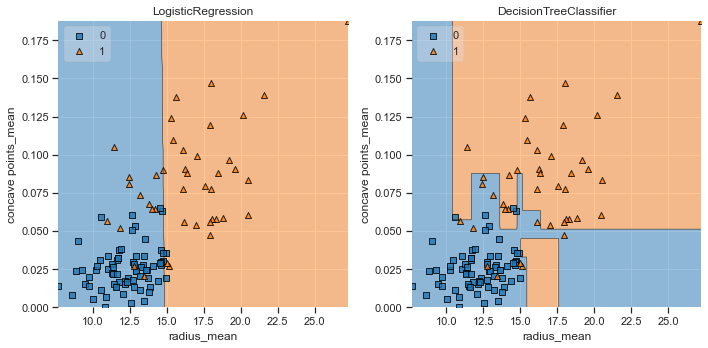

In [27]:
# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

We can easily see from the above graphs that the boundaries produced by the DecisionTreeClassifier for the feature space is rectangular instead of linear as the LogisticRegression classifier produces.

## Use entropy as a criterion for the DecisionTreeClassifier

In [28]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

In [29]:
# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [30]:
# Use dt_entropy to predict test set labels
y_pred_entropy = dt_entropy.predict(X_test)

In [31]:
# Evaluate the accuracy score of the predictions
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

## Use Gini index as a criterion for the DecisionTreeClassifier

In [32]:
# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

In [33]:
# Fit dt_gini to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [34]:
# Use dt_gini to predict test set labels
y_pred_gini = dt_gini.predict(X_test)

In [35]:
# Evaluate the accuracy score of the predictions
accuracy_gini = accuracy_score(y_test, y_pred_gini)

## Compare the Entropy vs. Gini index trained models

In [36]:
# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy} ')

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini}')

Accuracy achieved by using entropy: 0.8947368421052632 
Accuracy achieved by using the gini index: 0.8859649122807017


The two models achieve slightly different results. The default for `DecionsTreeClassifier` is the gini index because it is slightly faster. But as we can see it sometimes pays off to explore the 'entropy' model

## Use Voting Classifier with Ensemble learning method

In [37]:
# Import dependencies
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier  # This is the meta-model used for ensemble learning

In [38]:
# Create new train / test / split dataset using 30% test and 70% train
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=42)

In [39]:
# Instantiate individual classifiers
lr = LogisticRegression(random_state=42)
knn = KNN()
dt = DecisionTreeClassifier(random_state=42)

In [40]:
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers =[('Logisitic Regression', lr),
             ('K Nearest Neighbors', knn),
             ('Classification Tree', dt)]

In [41]:
# Using a for loop iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    # fit clf to the training set
    clf.fit(X_train, y_train)
    
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    
    # Evaluate the accuracy of the clf on the test set
    print(f"Model:{clf_name} Accuracy score: {accuracy_score(y_test, y_pred)}")

Model:Logisitic Regression Accuracy score: 0.9181286549707602
Model:K Nearest Neighbors Accuracy score: 0.9181286549707602
Model:Classification Tree Accuracy score: 0.9239766081871345


In [42]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)

In [43]:
# Fit 'vc' to the training set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

In [44]:
# Evaluate the test-set accuracy of 'vc'
print(f"Voting Classifier accuracy: {accuracy_score(y_test, y_pred)}")

Voting Classifier accuracy: 0.9239766081871345


## Bagging Classifier

In [45]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
# Split the data into 70% train and 30% test using stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   stratify=y,
                                                   random_state=1)

In [47]:
# Instantiate a calssification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=1)

In [48]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=1)

In [49]:
y_pred_dt = dt.predict(X_test)

In [50]:
# Evaluate an print test-set accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of DecisionTree Classifier: {accuracy_dt}")

Accuracy of DecisionTree Classifier: 0.9005847953216374


In [51]:
# Instantiate a BagginClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)

In [52]:
# Fit 'bc' to the training set
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        min_samples_leaf=0.16,
                                                        random_state=1),
                  n_estimators=300, n_jobs=-1)

In [53]:
# Predict the test set labels
y_pred_bc = bc.predict(X_test)

In [54]:
# Evaluate an print test-set accuracy
accuracy_bc = accuracy_score(y_test, y_pred_bc)
print(f"Accuracy of Bagging Classifier: {accuracy_bc}")

Accuracy of Bagging Classifier: 0.8771929824561403


## Out of Bag Evaluation

In [55]:
# Instantiate a BaggingClassifier 'bc_oob'; set oob_score=True
bc_oob = BaggingClassifier(base_estimator=dt, n_estimators=300,
                          oob_score=True, n_jobs=-1)

In [56]:
# Fit the 'bc_oob' to the training set
bc_oob.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        min_samples_leaf=0.16,
                                                        random_state=1),
                  n_estimators=300, n_jobs=-1, oob_score=True)

In [57]:
# Predict the test set labels
y_pred_bc_oob = bc_oob.predict(X_test)

In [58]:
# Evaluate the test set accuracy
test_accuracy_bc_oob = accuracy_score(y_test, y_pred_bc_oob)

In [59]:
# Extract the OOB accuracy from 'bc_oob'
oob_accuracy = bc_oob.oob_score_

In [60]:
# Print the bc_oob tes set accuracy
print(f"Test set accuracy: {test_accuracy_bc_oob}")
print(f"OOB accuracy: {oob_accuracy}")

Test set accuracy: 0.8771929824561403
OOB accuracy: 0.914572864321608


## AdaBoost Classification

In [61]:
# Import dependencies
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

In [62]:
# Split the data into 70% train and 30% test using stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   stratify=y,
                                                   random_state=1)

In [63]:
# Instantiate a classification-tree 'dt' with only max_depth = 1 to ensure it is a weak classifier
dt = DecisionTreeClassifier(max_depth=1, random_state=42)

In [64]:
# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)

In [65]:
# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=42),
                   n_estimators=100)

In [67]:
# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]

In [68]:
# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

In [70]:
# Print the adb_clf_roc_auc_score
print(f"ROC AUC score: {adb_clf_roc_auc_score:.3f}")

ROC AUC score: 0.958


## Tune hyperparameters of a CART - DecisionTreeClassifier

In [71]:
# Import dependencies
from sklearn.tree import DecisionTreeClassifier

In [72]:
# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state=42)

In [73]:
# Print out 'dt' hyperparameters that we can choose from
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


We will choose to optimize using a GridSearchCV on max_depth and max_features and min_samples_leaf

In [74]:
# Split the data into 70% train and 30% test using stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y,
                                                   random_state=42)

In [75]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [76]:
# Define a grid of hyperparameters 'params_dt'
params_dt = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

In [77]:
# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt,
                      param_grid=params_dt,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1)

In [78]:
# Fit 'grid_dt' to the training set data
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='accuracy')

In [79]:
# Extract the best hyperparameters from 'grid_dt' using 'best_params_' dictionary
best_hyperparams_dt = grid_dt.best_params_
print(f"Best dt hyperparameters:\n {best_hyperparams_dt}")

Best dt hyperparameters:
 {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.06}


In [80]:
# Extract the best CV score (accuracy) from 'grid_dt'
best_CV_score_dt = grid_dt.best_score_
print(f"Best dt CV accuracy: {best_CV_score_dt:.3f}")

Best dt CV accuracy: 0.916


In [81]:
# Extract the best model from 'grid_dt' using 'best_estimator_'
best_model = grid_dt.best_estimator_

In [82]:
# Evaluate test set accuracy
test_acc_best_dt = best_model.score(X_test, y_test)

In [83]:
# Print the best test set accuracy
print(f"Best Test set accuracy of best dt model: {test_acc_best_dt:.3f}")

Best Test set accuracy of best dt model: 0.895


The tuned dt model has a better accuracy of 89.5% vs. an untuned dt model of 88.6% (from cell 21 above)